# ML 4주차 세션 과제 
총 10 문제입니다.        
"" 부분에 코드를 작성해주시면 됩니다.      

교재 내용 잘 정리하셨다면 무리없을 것 같습니다.      
열심히 공부하시고 끝까지 잘 풀어주세요!

## 4-1. 로지스틱 회귀

### K 최근접 이웃 모델을 사용해 이웃 클래스 비율 구하기 

In [1]:
# 데이터 준비하기 
import pandas as pd  
fish = pd.read_csv('https://bit.ly/fish_csv') 
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 생선 종 확인하기 
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 종을 타깃으로 나머지 열을 입력데이터로 
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy ()

# 훈련세트,테스트세트로 나누기 
from sklearn.model_selection import train_test_split  
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 전처리 
from sklearn.preprocessing import StandardScaler  
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [4]:
# k 최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [5]:
# KNeighborsClassifier 에서 정렬된 타깃값
print(kn.classes_)

# 처음 5개 샘플 타깃 예측값
print(kn.predict(test_scaled[:5]))

# 예측한 클래스별 확률값 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5])  
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 문제 1)  
### your code
타깃값을 사이킷런 모델에서는 알파벳순서로 정렬한다. 정렬된 타깃값을 출력하기 위한 코드를 작성하시오.  
클래스 별 확률값을 알아내기 위한 코드 작성하시오. 

# 문제 2)
KNN으로 확률을 구하는 것의 한계는 무엇인가?             
    
정답: 가능한 확률값이 4개뿐이다. 연속적이지 않아서 확률로선 부족하다


### 로지스틱회귀 - 이진분류

In [6]:
# 도미와 빙어의 행만 가져오기 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]    
target_bream_smelt = train_target[bream_smelt_indexes]  

In [7]:
# 로지스틱 회귀 훈련  
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [8]:
# 5개 행 예측값 확인
lr.predict(train_bream_smelt[:5]) 

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [9]:
# 예측 확률 확인
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [10]:
# z 값 
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) 

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [11]:
# 시그모이드 함수값
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 문제 3)
### your code
사이파이가 제공하는 시그모이드 함수를 쓰시오. 

# 문제 4)
방금 위에서 출력한 값은(시그모이드 함수값) predict_proba()의  ◯◯클래스에 대한 확률과 동일하다.  
◯◯을 쓰시오.

정답: 양성

---

### 로지스틱 회귀 - 다중분류

In [12]:
# 로지스틱 회귀로 다중분류모델 훈련시키기 
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target) 

#과대,과소인지 체크 
print(lr.score(train_scaled, train_target))   
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [13]:
# 클래스
print(lr.classes_)

# 예측확률 확인헤보기   
proba = lr.predict_proba(test_scaled[:5])    
print (np.round (proba,decimals=3)) 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [14]:
# 선형방정식 모습 확인해보기 
print(lr.coef_.shape, lr.intercept_.shape) 

(7, 5) (7,)


In [15]:
# z값
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


# 문제 5) 
### your code 
z 값을 구하는 코드를 쓰시오.   

### 추가질문
다중분류에서 구하는 z의 개수는 무엇과 같은가?  
정답: 클래스의 개수 

In [16]:
# 소프트맥스 함숫값
from scipy.special import softmax 
proba = softmax(decisions, axis=1) 
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 확률적 경사 하강법

### SGDClassifier

In [17]:
# 데이터 프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [18]:
# 입력데이터, 타깃 데이터 구분
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', "Width"]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [19]:
# 훈련 세트 / 테스트 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [20]:
# 훈련 세트 & 테스트 세트 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
# 경사하강법 제공 분류 클래스 SGDClassifier 호출
from sklearn.linear_model import SGDClassifier

In [22]:
# SCDClassifier 객체 생성
sc = SGDClassifier(loss='log_loss',max_iter=10 , random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 사이킷런 업데이트에 따라 loss 값을 log_loss로 지정해야 실행됨.

0.8151260504201681
0.8


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# 문제 6
위 코드 중 객체 생성 과정에서의 코드를 완성하시오

정답 : 1)'log_loss'
       2)max_iter=10 

In [23]:
# 모델을 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.8


# 문제 7
위의 코드를 완성하고 그렇게 코딩한 이유에 대해 설명하시오.

정답 : 
1)partial_fit   
2) 점진적 학습을 하기 위해서 

### 에포크와 과대/과소적합

In [24]:
# 조기종료 그래프 생성
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [25]:
# 300 epoch 동안 훈련
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

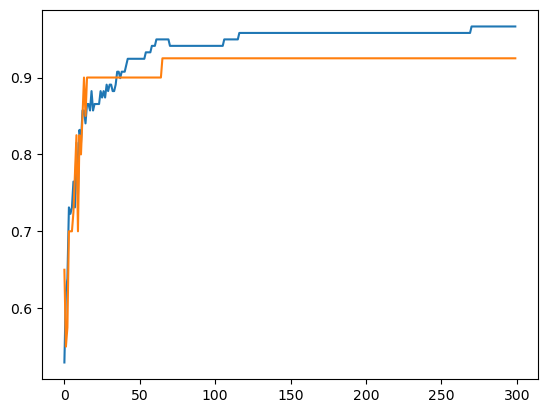

In [26]:
# 300 epoch 동안 훈련세트&테스트세트 점수 그래프 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

# 문제 8
위 그래프에서 알 수 있는 적절한 훈련 반복횟수는?

정답 : 100

In [27]:
# 반복회수를 100으로 설정해서 모델 재훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


# 문제 9
위 코드에서 'tol = None'이 의미하는 바를 서술하시오.

정답 : 성능이 향상되지 않을떄 학습이 멈출 수 있는데 이를 방지한다. 

In [28]:
# 힌지손실을 사용한 모데 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 문제 10
위 코드를 완성하고 빈칸에 들어갈 개념에 대해 간략히 설명하시오.

정답 : 
1) hinge
2) 소프트 벡터 머신을 위한 알고리즘이다.